Analysis of the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/car_data.csv')

In [ ]:
print("Dataset Info:")
dataset.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
print("\nMissing Values:")
print(dataset.isnull().sum())



Missing Values:
User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


In [ ]:
print("\nStatistical Summary:")
print(dataset.describe())


Statistical Summary:
           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000


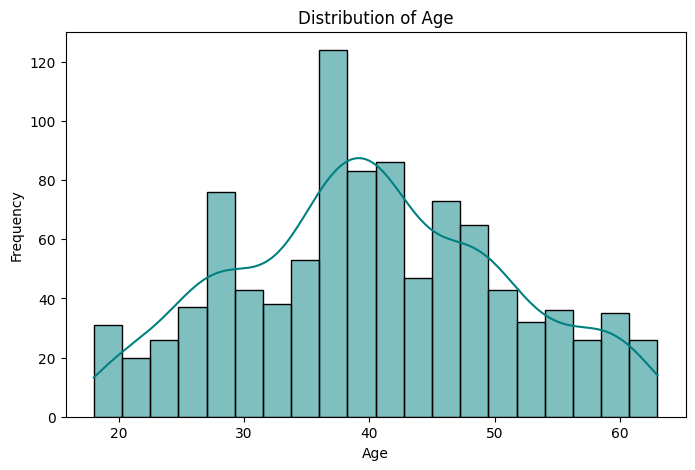

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Age'], kde=True, bins=20, color='teal')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

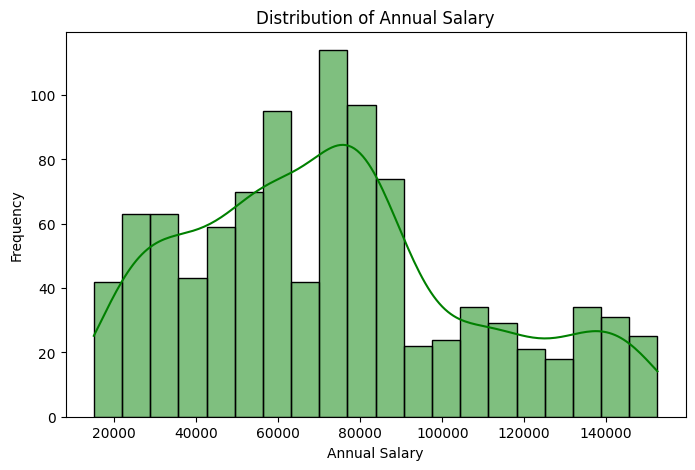

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset['AnnualSalary'], kde=True, bins=20, color='green')
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.show()

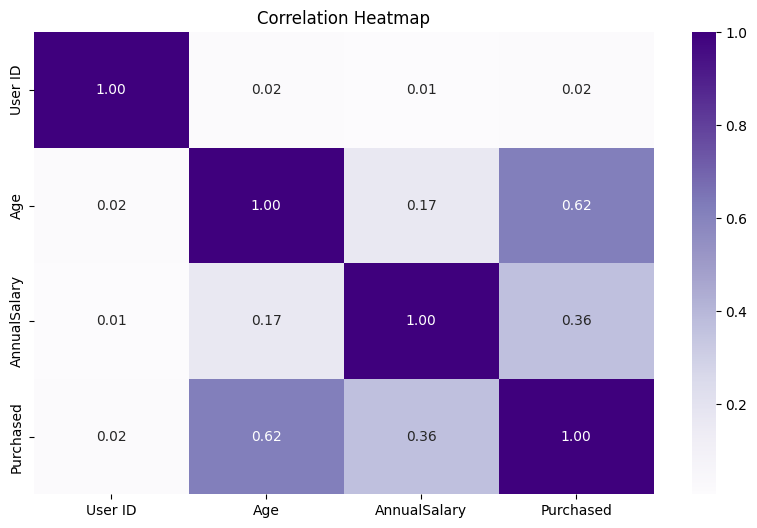

In [ ]:
numeric_dataset = dataset.select_dtypes(include=['number']).drop('Gender', axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='Purples', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Segmentation of the Dataset

Segmentation by Age, Gender and Income

<ipython-input-7-031ce2ae5f68>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  male_result = male_purchased.groupby(['AgeGroup', 'IncomeRange']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
<ipython-input-7-031ce2ae5f68>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  female_result = female_purchased.groupby(['AgeGroup', 'IncomeRange']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)


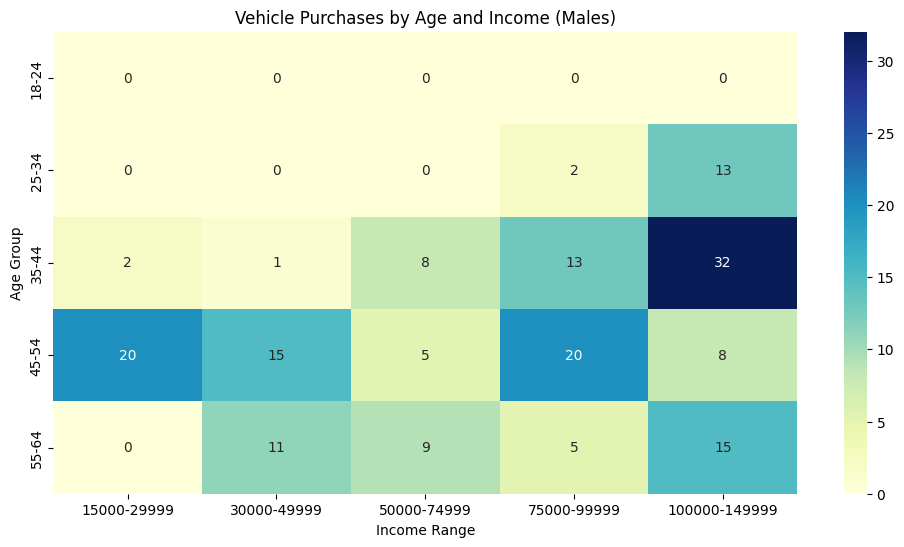

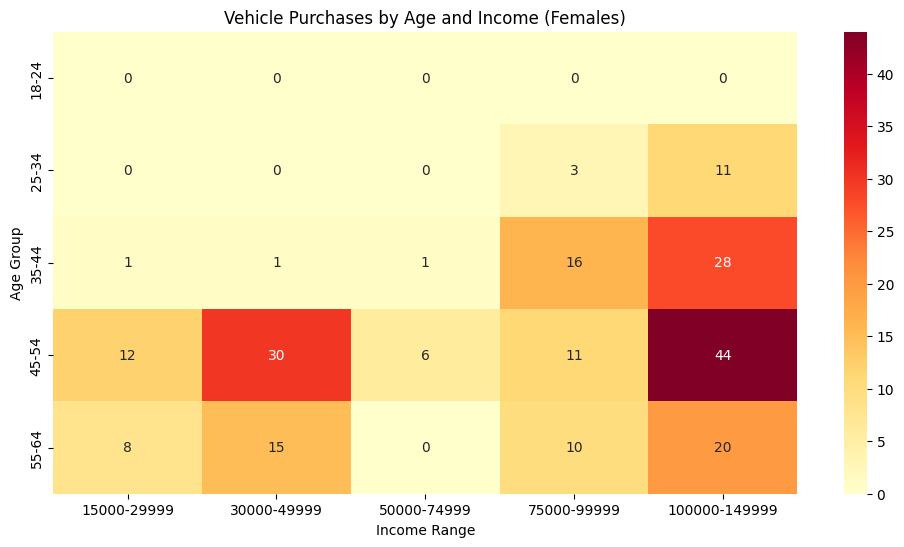

(   AgeGroup    IncomeRange  Count
 14    35-44  100000-149999     32
 15    45-54    15000-29999     20
 18    45-54    75000-99999     20
 16    45-54    30000-49999     15
 24    55-64  100000-149999     15
 9     25-34  100000-149999     13
 13    35-44    75000-99999     13
 21    55-64    30000-49999     11
 22    55-64    50000-74999      9
 12    35-44    50000-74999      8
 19    45-54  100000-149999      8
 23    55-64    75000-99999      5
 17    45-54    50000-74999      5
 8     25-34    75000-99999      2
 10    35-44    15000-29999      2
 11    35-44    30000-49999      1
 0     18-24    15000-29999      0
 7     25-34    50000-74999      0
 6     25-34    30000-49999      0
 5     25-34    15000-29999      0
 4     18-24  100000-149999      0
 2     18-24    50000-74999      0
 3     18-24    75000-99999      0
 1     18-24    30000-49999      0
 20    55-64    15000-29999      0,
    AgeGroup    IncomeRange  Count
 19    45-54  100000-149999     44
 16    45-54    300

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Dataset/car_data.csv')
def categorize_ranges(df, age_bins, income_bins):
    df.loc[:, 'AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=[f'{age_bins[i]}-{age_bins[i+1]-1}' for i in range(len(age_bins)-1)])
    df.loc[:, 'IncomeRange'] = pd.cut(df['AnnualSalary'], bins=income_bins, labels=[f'{income_bins[i]}-{income_bins[i+1]-1}' for i in range(len(income_bins)-1)])
    return df

age_bins = [18, 25, 35, 45, 55, 65]
income_bins = [15000, 30000, 50000, 75000, 100000, 150000]

male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

male_data = categorize_ranges(male_data.copy(), age_bins, income_bins)
female_data = categorize_ranges(female_data.copy(), age_bins, income_bins)

# males who purchased
male_purchased = male_data[male_data['Purchased'] == 1]
male_result = male_purchased.groupby(['AgeGroup', 'IncomeRange']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# females who purchased
female_purchased = female_data[female_data['Purchased'] == 1]
female_result = female_purchased.groupby(['AgeGroup', 'IncomeRange']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Visualization for males
plt.figure(figsize=(12, 6))
male_pivot = male_result.pivot(index='AgeGroup', columns='IncomeRange', values='Count')
sns.heatmap(male_pivot, annot=True, fmt="g", cmap="YlGnBu")
plt.title('Vehicle Purchases by Age and Income (Males)')
plt.xlabel('Income Range')
plt.ylabel('Age Group')
plt.show()

# Visualization for females
plt.figure(figsize=(12, 6))
female_pivot = female_result.pivot(index='AgeGroup', columns='IncomeRange', values='Count')
sns.heatmap(female_pivot, annot=True, fmt="g", cmap="YlOrRd")
plt.title('Vehicle Purchases by Age and Income (Females)')
plt.xlabel('Income Range')
plt.ylabel('Age Group')
plt.show()
S
male_result, female_result
